# Programming Exercise 2 - Logistic Regression
- [Logistic regression]()
- [Regularized logistic regression]()

In [13]:
import os

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [38]:
def loadData(file, delimiter):
    data = np.loadtxt(file, delimiter = delimiter)
    print('Dimensions: ', data.shape)
    print(data[1:6, :])
    return (data)

In [39]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes = None):
    # Get indexes for class 0 and class 1
    pos = data[:, 2] == 1
    neg = data[:, 2] == 0
    print(pos)
    print(neg)
    print(data[pos])
    print(data[neg])

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:, 0], data[pos][:, 1], marker = '+', c = 'k', s = 60, linewidths = 2, label = label_pos)
    axes.scatter(data[neg][:, 0], data[neg][:, 1], c = 'y', s = 60, label = label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True)

## Logistic regression

In [ ]:
cwd = os.getcwd()
path = cwd + '/notebooks/data/ex2data1.txt'
data = loadData(path, ',')


In [43]:
X = np.c_[np.ones((data.shape[0], 1)), data[:, 0:2]]
y = np.c_[data[:, 2]]

[False False False  True  True False  True  True  True  True False False
  True  True False  True  True False  True  True False  True False False
  True  True  True False False False  True  True False  True False False
 False  True False False  True False  True False False False  True  True
  True  True  True  True  True False False False  True False  True  True
  True False False False False False  True False  True  True False  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True False  True  True False  True  True False  True  True  True
  True  True  True  True]
[ True  True  True False False  True False False False False  True  True
 False False  True False False  True False False  True False  True  True
 False False False  True  True  True False False  True False  True  True
  True False  True  True False  True False  True  True  True False False
 False False False False False  True  True  True False  True False False
 False  True  True  True 

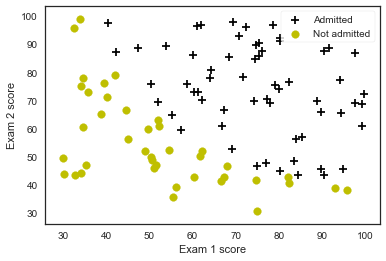

In [44]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

### Logistic regression hypothesis
### $$h_{\theta}(x) = g(\theta^{T}x)$$
### $$g(z)=\frac{1}{1+e^{−z}}$$

In [46]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))